# Stats 131 Final Project Report: Global Terrorism
##### Group Name: 95% Confident

##### Group Members: Teresa Abbey, Kimberly Ma, Brian Ng


### Introduction to Dataset

  This data explores information on over 170,000 terrorist attacks from the Global Terrorism Database (GTD) from 1970 to 2016. It contains 135 variables including location, weapon type, target, perpetrator and type of attack.

The GTD characterizes a terrorist attack as “the threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation”. An event must have all three of the following components for it to be considered a terrorist attack by the GTD. First, the attack must be intentional. Second, the act must have involve some level of violence or threat of violence. Finally, the perpetrators of the attack must be “sub-national actors” ( this database does not include state terrorism). In addition to these three criteria an event must have two of three of the following attributes. First, “the act must be aimed at attaining a political, economic, religious, or social goal.” Second, “There must be evidence of an intention to coerce, intimidate, or convey some other message to a larger audience (or audiences) than the immediate victims.” Finally, “the action must be outside the context of legitimate warfare activities”.

The National Consortium for the Study of Terrorism and Responses to Terrorism (START) collected data starting in 2006. Prior to this period, a private security agency, Pinkerton Global Intelligence Service (PGIS), collected the data for attacks from 1970 to 1997. The data was collected from publicly available materials including media articles and electronic news along with some secondary materials such as past datasets and journals. While the GTD tires to stay clear of including information that is biased, including details such as who claimed responsibility for the attack and the motive for the attack(s) can be biased. In more recent years, starting in 2012, the GTD team utilizes computer programs to filter through online resources related to terrorism to gather useful pieces of information. After being filtered the GTD team will review the chosen articles to find the those events that satisfy the criteria to be included in the GTD. One possible problem with the method of collection of this data is the lack of reliable sources of information in some areas of the world. Therefore the amount of documentation of attacks in some  areas may be scarce compared to others. This might create a problem of class imbalance for certain variables, thus affecting predictive models to a certain degree.

### Import Packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv("~/Desktop/Stats_131_Project/globalterrorism.csv", encoding='ISO-8859-1', low_memory = False)

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Columns: 135 entries, eventid to related
dtypes: float64(53), int64(24), object(58)
memory usage: 175.5+ MB


In [5]:
data.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            162886
extended                   0
resolution            168131
country                    0
country_txt                0
region                     0
region_txt                 0
provstate              14502
city                     446
latitude                4606
longitude               4606
specificity                4
vicinity                   0
location              122376
summary                66138
crit1                      0
crit2                      0
crit3                      0
doubtterr                  0
alternative           143719
alternative_txt       143719
multiple                   0
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
                       ...  
propextent            109805
propextent_txt        109805
propvalue             134863
propcomment   

### Defining Functions

#### Chisquare Test

In [6]:
def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    chisquare, pvalue, degrees, expect = chi2_contingency(ctsum.fillna(0))
    print("Chi Square Statistic:" + str(chisquare), "\n p Value:" + str(pvalue))

### Data Cleaning

#### Remove Variables That Are Not Relevant in Predicting Attack Type Based On Our Intuitions

In [7]:
data2= data[["eventid", "iyear", "imonth", "crit1", "crit2", \
             "crit3", "doubtterr", "multiple", "country", \
             "country_txt", "region", "region_txt", "attacktype1", \
             "attacktype1_txt", "success", "weaptype1", \
             "weaptype1_txt", "suicide", \
             "targtype1", "targtype1_txt", "target1", \
             "natlty1", "gname", \
             "INT_LOG", "INT_IDEO", "latitude", "longitude"]]

#### Remove Observations Whose Exact Month of Incident is Unknown (imonth = 0)

In [8]:
data2 = data2[data2["imonth"] != 0]

In [9]:
print(data2.imonth.unique())

[ 7  1  2  3  4  5  6  8  9 10 11 12]


#### Remove Observations Whose Country is Unknown (country = Unknown)

In [10]:
data2 = data2[data2["country_txt"] != "Unknown"]

In [11]:
data2.isnull().sum()

eventid               0
iyear                 0
imonth                0
crit1                 0
crit2                 0
crit3                 0
doubtterr             0
multiple              0
country               0
country_txt           0
region                0
region_txt            0
attacktype1           0
attacktype1_txt       0
success               0
weaptype1             0
weaptype1_txt         0
suicide               0
targtype1             0
targtype1_txt         0
target1             635
natlty1            1394
gname                 0
INT_LOG               0
INT_IDEO              0
latitude           4602
longitude          4602
dtype: int64

In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170330 entries, 0 to 170349
Data columns (total 27 columns):
eventid            170330 non-null int64
iyear              170330 non-null int64
imonth             170330 non-null int64
crit1              170330 non-null int64
crit2              170330 non-null int64
crit3              170330 non-null int64
doubtterr          170330 non-null int64
multiple           170330 non-null int64
country            170330 non-null int64
country_txt        170330 non-null object
region             170330 non-null int64
region_txt         170330 non-null object
attacktype1        170330 non-null int64
attacktype1_txt    170330 non-null object
success            170330 non-null int64
weaptype1          170330 non-null int64
weaptype1_txt      170330 non-null object
suicide            170330 non-null int64
targtype1          170330 non-null int64
targtype1_txt      170330 non-null object
target1            169695 non-null object
natlty1            168

#### Remove Observations Whose Attack Type is Unknown (attacktype1_txt = Unknown)

In [13]:
data2 = data2[data2["attacktype1_txt"] != "Unknown"]

#### Remove Observations Whose Weapon Type is Unknown (weaptype1_txt = Unknown)

In [14]:
data2 = data2[data2["weaptype1_txt"] != "Unknown"]

#### Checking If the Categories With Smaller Counts Have Sufficient Observations for Modeling

In [15]:
print(len(data2[data2["attacktype1_txt"] == "Unarmed Assault"]))
print(len(data2[data2["attacktype1_txt"] == "Hijacking"]))
print(len(data2[data2["attacktype1_txt"] == "Hostage Taking (Barricade Incident)"]))

913
445
754


There are sufficient observations for categories that have the smallest counts among all categories, so we can apply our algorithms

#### Summary Statistics

In [16]:
data2.describe()

,eventid,iyear,imonth,crit1,crit2,crit3,doubtterr,multiple,country,region,attacktype1,success,weaptype1,suicide,targtype1,natlty1,INT_LOG,INT_IDEO,latitude,longitude
count,1.564780e+05,156478.000000,156478.000000,156478.000000,156478.000000,156478.000000,156478.000000,156478.000000,156478.000000,156478.000000,156478.000000,156478.000000,156478.000000,156478.000000,156478.00000,155238.000000,156478.000000,156478.000000,152726.000000,152726.000000
mean,2.001892e+11,2001.825809,6.467746,0.988152,0.993545,0.881517,-0.499942,0.135648,133.538779,7.095496,2.909700,0.895992,5.846899,0.036861,8.41880,127.798580,-4.701613,-4.633987,23.704017,26.777907
std,1.308087e+09,13.080769,3.390333,0.108204,0.080081,0.323180,2.407619,0.342416,113.668275,2.933053,1.449491,0.305272,0.939150,0.188422,6.69185,86.812849,4.538576,4.620417,18.855995,58.379949
min,1.970010e+11,1970.000000,1.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.00000,4.000000,-9.000000,-9.000000,-53.154613,-176.176447
25%,1.990071e+11,1990.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,78.000000,5.000000,2.000000,1.000000,5.000000,0.000000,3.00000,87.000000,-9.000000,-9.000000,11.833333,2.833880
50%,2.008022e+11,2008.000000,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,98.000000,6.000000,3.000000,1.000000,6.000000,0.000000,4.00000,102.000000,-9.000000,-9.000000,31.583056,43.130090
75%,2.014021e+11,2014.000000,9.000000,1.000000,1.000000,1.000000,0.000000,0.000000,160.000000,10.000000,3.000000,1.000000,6.000000,0.000000,14.00000,173.000000,0.000000,0.000000,34.793337,68.647303
max,2.017013e+11,2016.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1004.000000,12.000000,8.000000,1.000000,12.000000,1.000000,22.00000,1004.000000,1.000000,1.000000,74.633553,178.441900


There are no unusual features or outliers present in our data, but there are variables with many missing values

### Questions of Interest

1. Can we predict attack type based on past attacks?
2. What variables best predict attack type?

### Exploratory Data Analysis

To answer our questions of interest, we have the following questions:
1. Which variables have high correlation with attack type?
2. Is there any relationships/ trends between other variables and attack types?

In this section, we explore the distributions of attack type and related variables, including month, weapon types, target types, multiple attacks, etc.

#### Correlation Matrix

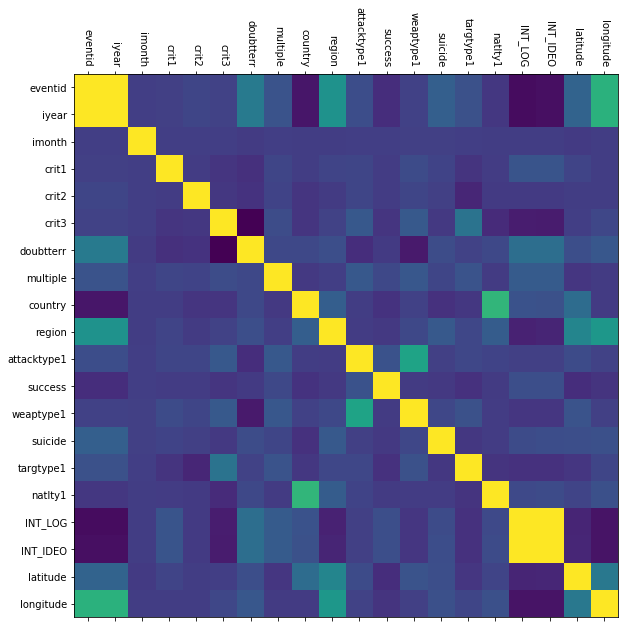

In [17]:
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 270);
    plt.yticks(range(len(corr.columns)), corr.columns);

plot_corr(data2)

From the correlation plot, we can see that attack type has a moderately high correlation with weapon type, doubtterr, country, and region.

#### Examining the Trend of Terrorist Attack

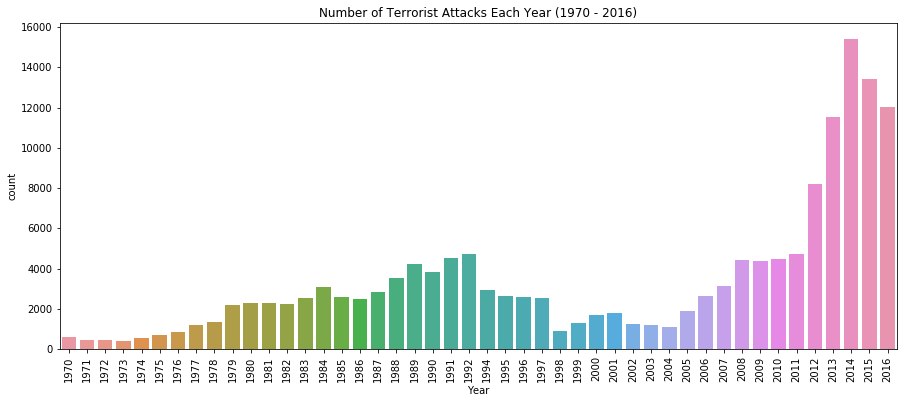

In [18]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.iyear)
plt.xticks(rotation = 90)
plt.title("Number of Terrorist Attacks Each Year (1970 - 2016)")
plt.xlabel("Year")
plt.show()

The plot shows a clear increasing trend in the number of terrorist attacks, peaking in 2014

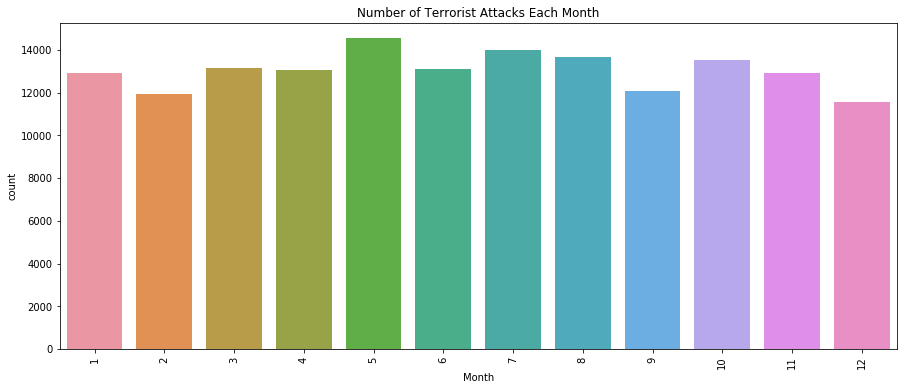

In [19]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.imonth)
plt.xticks(rotation = 90)
plt.title("Number of Terrorist Attacks Each Month")
plt.xlabel("Month")
plt.show()

According to the plot, the distribution of terrorist attacks by month is relatively uniform 

#### Examining Distribution of Terrorist Attacks By Year and Regions

In [20]:
data2.pivot_table(index = "region_txt", columns = "iyear", values = "eventid", aggfunc = "count", fill_value = 0)

iyear,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
region_txt,,,,,,,,,,,,,,,,,,,,,
Australasia & Oceania,1,1,2,1,1,0,0,0,2,2,...,1,8,1,1,0,0,1,9,14,10
Central America & Caribbean,1,4,3,3,9,9,41,16,151,398,...,4,0,9,1,1,1,14,5,1,3
Central Asia,0,0,0,0,0,0,0,0,0,0,...,4,34,29,8,9,12,7,8,9,16
East Asia,2,1,0,2,4,12,2,1,35,14,...,0,25,8,1,4,4,14,41,27,8
Eastern Europe,12,4,1,1,1,0,0,2,2,1,...,60,206,162,259,195,172,164,841,654,124
Middle East & North Africa,22,46,30,18,40,39,51,208,120,412,...,1370,1492,1336,1426,1601,2358,4407,6383,5258,5443
North America,469,246,67,61,107,153,117,144,106,74,...,19,30,15,23,12,38,32,33,62,72
South America,43,14,15,52,61,49,78,89,170,176,...,46,128,152,137,98,124,159,249,151,109
South Asia,1,0,1,0,2,3,4,2,2,29,...,924,1569,1747,1773,1969,3651,4418,4633,4188,3151


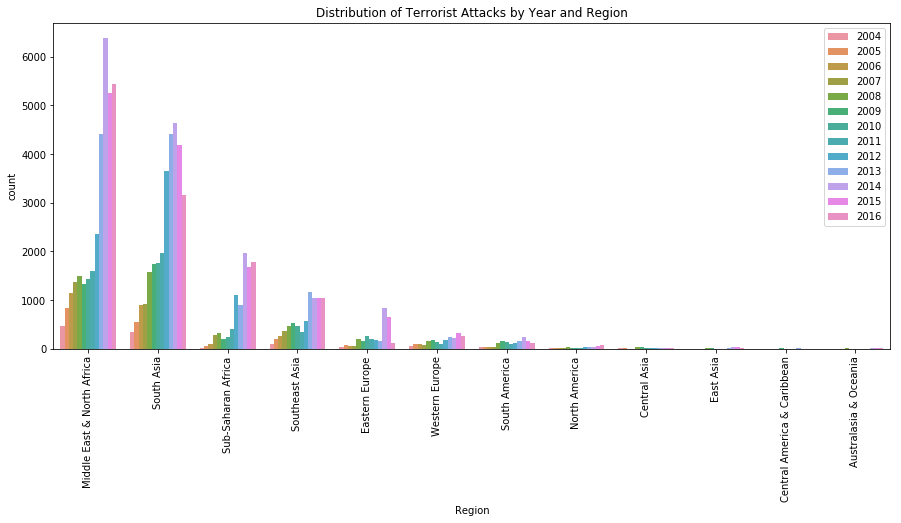

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.region_txt[data2.iyear.isin(np.arange(2004, 2017, 1))],\
              hue = data2.iyear[data2.iyear.isin(np.arange(2004, 2017, 1))],\
              order = data2.region_txt[data2.iyear.isin(np.arange(2004, 2017, 1))].value_counts().index)
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
plt.title("Distribution of Terrorist Attacks by Year and Region")
plt.xlabel("Region")
plt.show()

From the table and plot, most regions show an overall increasing trend in terrorist attacks across the years, with the most terrorist attacks being in 2014

#### Examining Distribution of Terrorist Attacks by Month and Regions

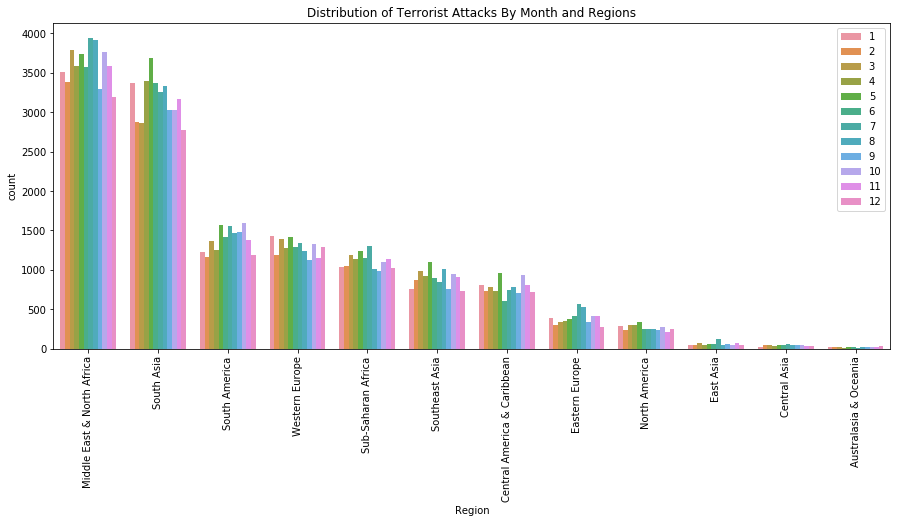

In [22]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.region_txt,\
              hue = data2.imonth,\
              order = data2.region_txt.value_counts().index)
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
plt.title("Distribution of Terrorist Attacks By Month and Regions")
plt.xlabel("Region")
plt.show()

The distribution is relatively uniform for most the regions, but there may be some trends for regions such as South America, Middle East and North Africa, and South Asia

Also, there are usually spikes in every other month starting from January, suggesting a possibility of patterns in terrorist attacks

#### Examining the Distribution of Attack Type

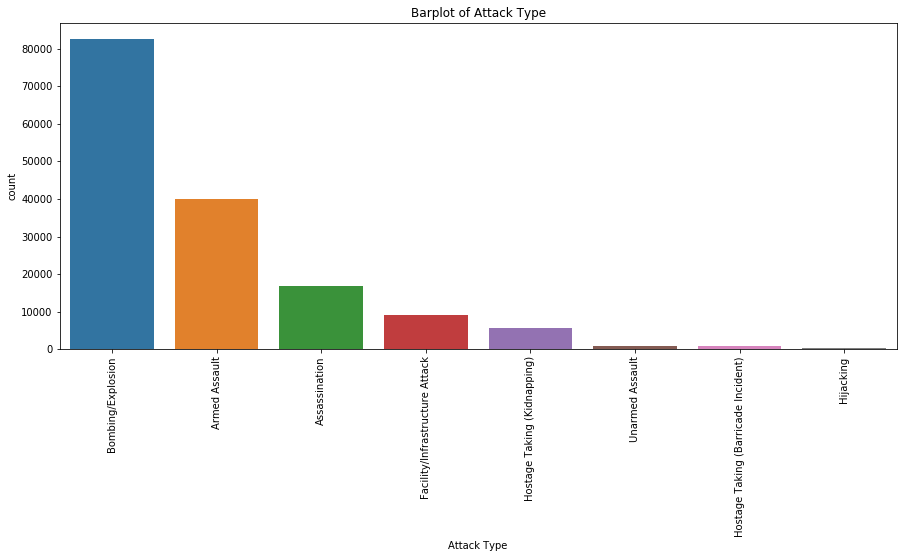

In [23]:
plt.subplots(figsize=(15, 6))
sns.countplot(data2.attacktype1_txt, order = data2.attacktype1_txt.value_counts().index)
plt.xticks(rotation = 90)
plt.title("Barplot of Attack Type")
plt.xlabel("Attack Type")
plt.show()

From the barplot, terrorist attacks in the form of bombing/ explosion happened with the highest frequency, followed by armed assault and assassination. Terrorist attacks in the form of facility/ infrastructure attack and hostage taking (kidnapping) also occurred with moderate frequencies. Hijacking, unarmed assault, and hostage taking (barricade incident) happened relatively less frequently.

#### Examining Distribution of Attack Types By Year (2004 - 2016)

In [24]:
data2.pivot_table(index = "attacktype1_txt", columns = "iyear", values = "eventid", aggfunc = "count", fill_value = 0)

iyear,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
attacktype1_txt,,,,,,,,,,,,,,,,,,,,,
Armed Assault,61,44,63,62,46,81,124,255,241,442,...,846,1081,1101,1093,1388,2078,2958,4066,3339,2713
Assassination,17,67,191,158,155,177,198,141,244,442,...,137,202,220,355,334,449,830,873,885,780
Bombing/Explosion,333,238,187,149,281,369,418,630,639,1047,...,1863,2660,2566,2509,2589,5079,6672,8775,7608,7075
Facility/Infrastructure Attack,174,88,18,36,42,64,113,180,177,179,...,115,272,336,286,236,287,526,652,645,629
Hijacking,8,3,6,4,3,0,2,5,0,9,...,7,12,17,9,8,5,12,39,26,30
Hostage Taking (Barricade Incident),3,1,4,7,5,11,6,12,39,60,...,6,2,4,8,2,18,25,42,69,58
Hostage Taking (Kidnapping),3,1,6,7,4,5,3,2,3,18,...,167,189,114,189,162,284,470,920,738,672
Unarmed Assault,3,0,0,3,4,0,3,0,5,7,...,6,33,19,21,20,29,39,53,95,70


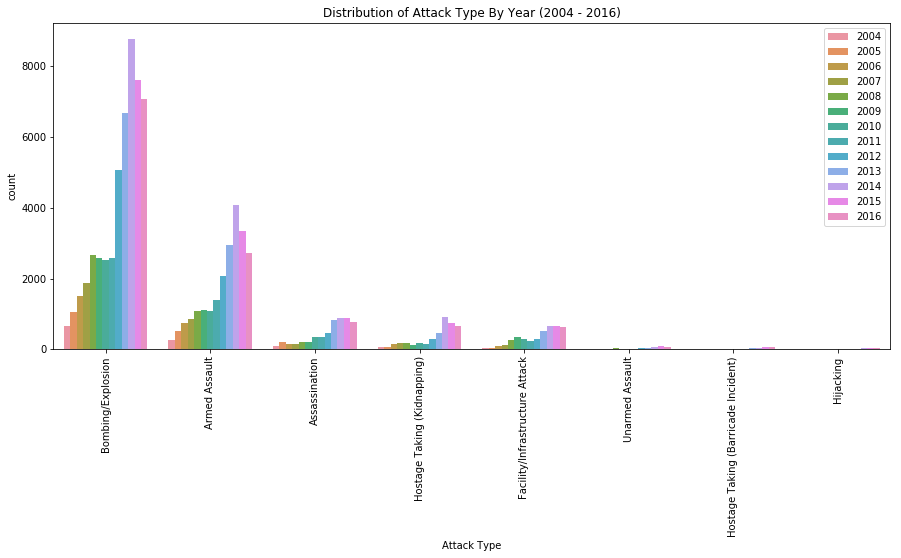

In [25]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.attacktype1_txt[data2.iyear.isin(np.arange(2004, 2017, 1))],\
              hue = data2.iyear[data2.iyear.isin(np.arange(2004, 2017, 1))],\
              order = data2.attacktype1_txt[data2.iyear.isin(np.arange(2004, 2017, 1))].value_counts().index)
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
plt.title("Distribution of Attack Type By Year (2004 - 2016)")
plt.xlabel("Attack Type")
plt.show()

Generally, the frequency of each attack type shows an overall increasing trend from 2004 to 2016

But it does not make sense to use year as a predictor for future attacks, so we will drop the variable from the model

#### Examining Distribution of Attack Types By Month of the Year

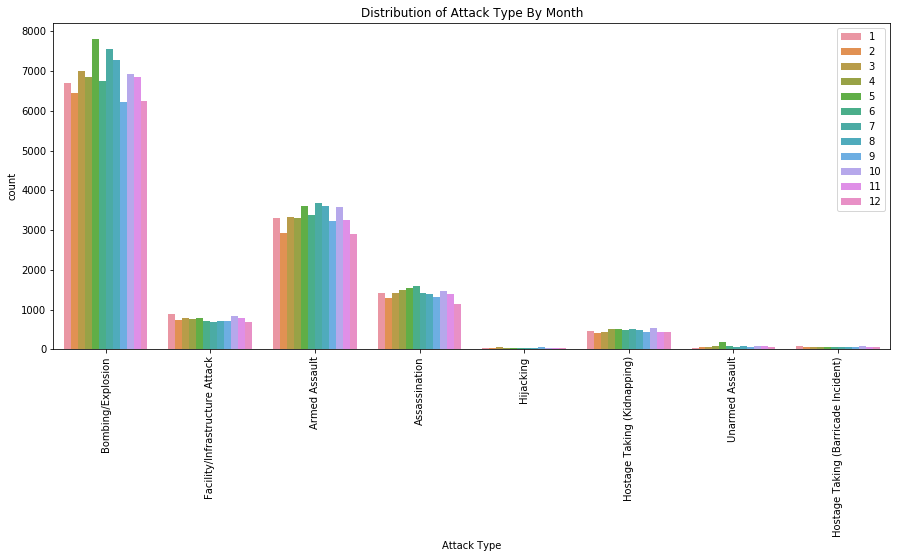

In [26]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.attacktype1_txt,\
              hue = data2.imonth)
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
plt.title("Distribution of Attack Type By Month")
plt.xlabel("Attack Type")
plt.show()

In [27]:
chisq_of_df_cols(data2, "attacktype1_txt", "imonth")

Chi Square Statistic:356.9110702916961 
 p Value:1.2722275699238038e-37


From the plot, there are usually spikes in every other month starting from January, suggesting a possibility of patterns in terrorist attacks

Also, from the Chisquare test of independence, the p-value is very small, thus we reject the null hypothesis and conclude that the variables are dependent

#### Examining Distribution of Attack Types by Regions

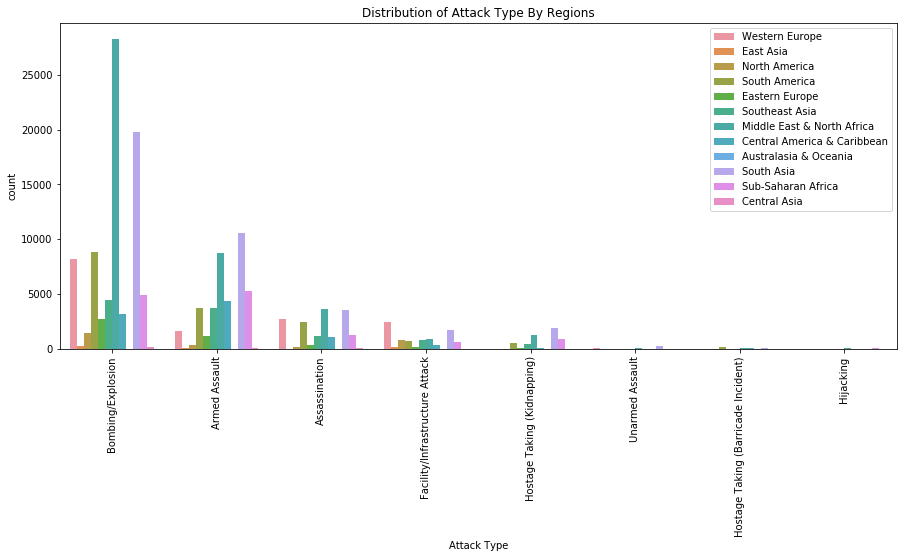

In [28]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.attacktype1_txt,\
              hue = data2.region_txt,\
              order = data2.attacktype1_txt.value_counts().index)
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
plt.title("Distribution of Attack Type By Regions")
plt.xlabel("Attack Type")
plt.show()

In [29]:
chisq_of_df_cols(data2, "attacktype1_txt", "region_txt")

Chi Square Statistic:19704.243238637693 
 p Value:0.0


From the plot, a larger proportion of Bombing/ Explosion occured in Middle East and North Africa, while a larger proportion of Armed Assault occured in South ASia

Also, from the Chisquare test of independence, the p-value is very small, thus we reject the null hypothesis and conclude that the variables attack type and region are dependent

#### Examining Attack Types by Weapon Type

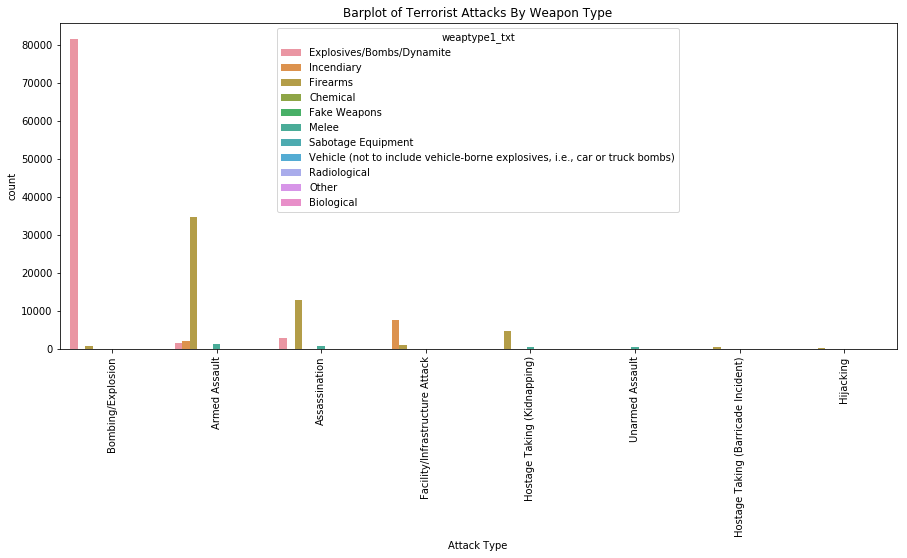

In [30]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.attacktype1_txt, hue = data2.weaptype1_txt, \
              order = data2.attacktype1_txt.value_counts().index)
plt.xticks(rotation = 90)
plt.title("Barplot of Terrorist Attacks By Weapon Type")
plt.xlabel("Attack Type")
plt.show()

In [31]:
chisq_of_df_cols(data2, "attacktype1_txt", "weaptype1_txt")

Chi Square Statistic:286105.709038578 
 p Value:0.0


From the plot, as expected in Bombing/ Explosion attacks terrorist would use explosives/ bombs/ dynamite as their weapons. Also, terrorist generally use firearms for armed assault, assassination, facility/infrastructure attack, and hostage taking (kidnapping)

Also, from the Chisquare test of independence, the p-value is very small, thus we reject the null hypothesis and conclude that the variables attack type and weapon type are dependent

#### Examining Attack Types by Whether the Attack is Part of Multiple Incident

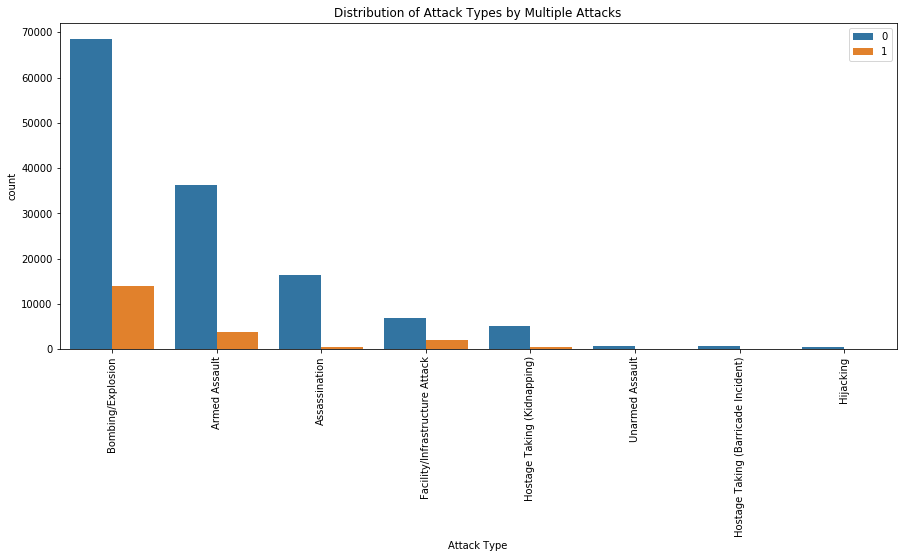

In [32]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.attacktype1_txt,\
              hue = data2.multiple,\
             order = data2.attacktype1_txt.value_counts().index)
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
plt.title("Distribution of Attack Types by Multiple Attacks")
plt.xlabel("Attack Type")
plt.show()

In [33]:
chisq_of_df_cols(data2, "attacktype1_txt", "multiple")

Chi Square Statistic:4105.15791535778 
 p Value:0.0


From the plot, in general, a larger proportion of each attack type is not part of multiple incident. The proportion of attacks that are not multiple incident is the highest for Bombing/ Explosion, followed by Armed Assault, Assassination, and other categories

Also, from the Chisquare test of independence, the p-value is very small, thus we reject the null hypothesis and conclude that the variables attack type and multiple are dependent

#### Examining Attack Types by Target Types

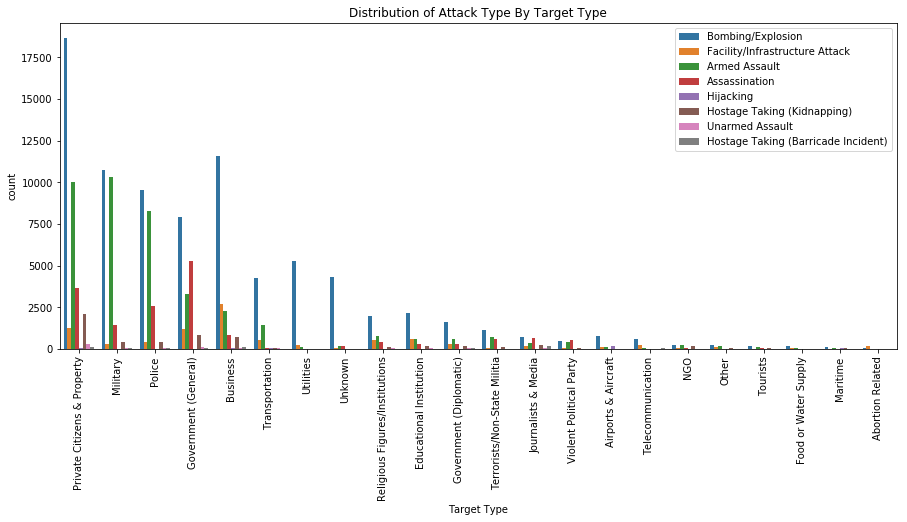

In [34]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.targtype1_txt, hue=data2.attacktype1_txt, order=data2.targtype1_txt.value_counts().index)
plt.xticks(rotation = 90)
plt.title("Distribution of Attack Type By Target Type")
plt.xlabel("Target Type")
plt.legend(loc="upper right")
plt.show()

In [35]:
chisq_of_df_cols(data2, "attacktype1_txt", "targtype1_txt")

Chi Square Statistic:51477.416310577835 
 p Value:0.0


From the plot, we can see that majority of terrorist attacks are done by bombings/explosions on private citizens and property and bombings/explosions on business targets, similar frequencies for armed assault on private citizens and property, armed assault on military, and then bombings/explosions on police. The next moderate frequencies are armed assault on police and bombings/explosions on government. Also, most assassinations are done on government

From the Chisquare test of independence, the p-value is very small, thus we reject the null hypothesis and conclude that the variables attack type and target type are dependent

#### Examining Attack Types by Criterion 1 (Whether the Attack Aimed at Attaining Political, Economic, Religious, or Social Goal)

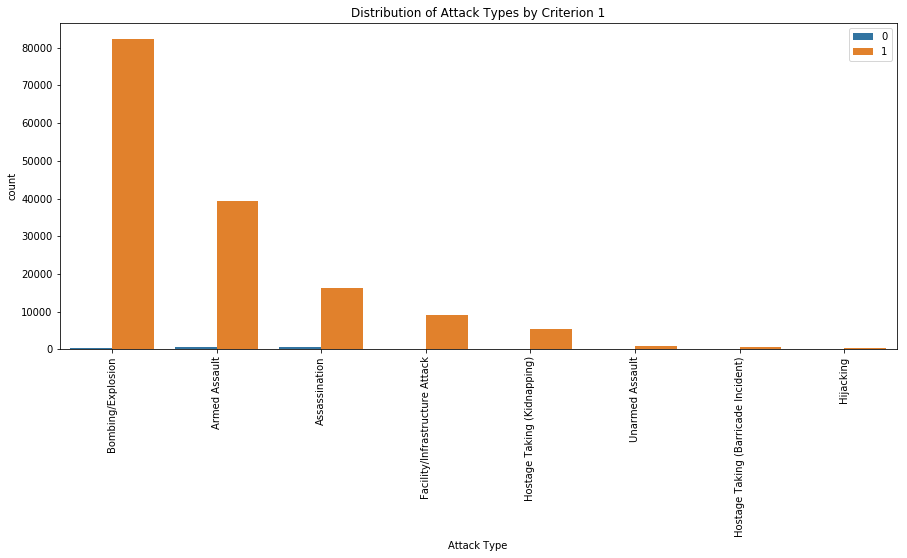

In [36]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.attacktype1_txt,\
              hue = data2.crit1,\
             order = data2.attacktype1_txt.value_counts().index)
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
plt.title("Distribution of Attack Types by Criterion 1")
plt.xlabel("Attack Type")
plt.show()

In [37]:
chisq_of_df_cols(data2, "attacktype1_txt", "crit1")

Chi Square Statistic:1684.146795749174 
 p Value:0.0


From the plot, most attack types are to attain political, economic, religious, or social goals

From the Chisquare test of independence, the p-value is very small, thus we reject the null hypothesis and conclude that the variables attack type and crit1 are dependent

#### Examining Attack Types by Criterion 2 (Whether the Attack Aimed at Coercing, Intimidating or Publicizing to Larger Audience(s))

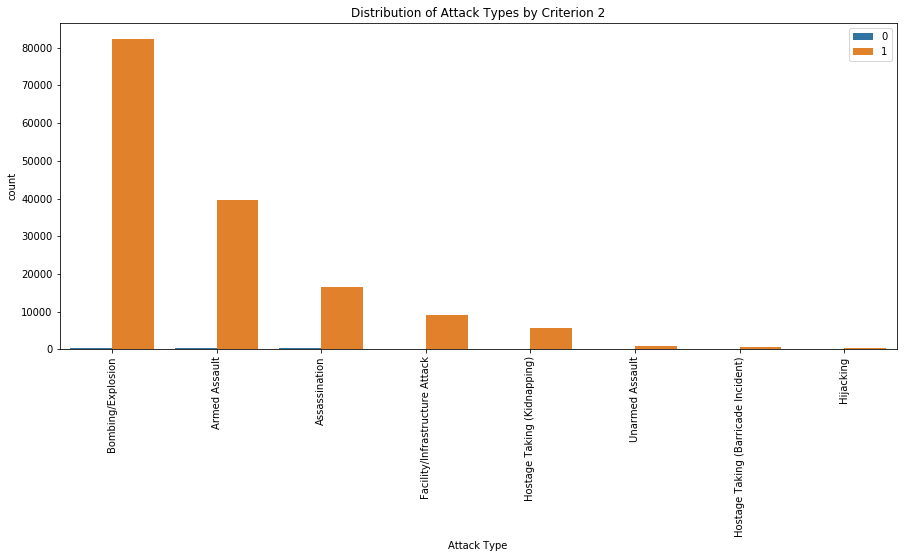

In [38]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.attacktype1_txt,\
              hue = data2.crit2,\
             order = data2.attacktype1_txt.value_counts().index)
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
plt.title("Distribution of Attack Types by Criterion 2")
plt.xlabel("Attack Type")
plt.show()

In [39]:
chisq_of_df_cols(data2, "attacktype1_txt", "crit2")

Chi Square Statistic:641.3366492244123 
 p Value:3.0371658778848603e-134


From the plot, most attack types are to coerce, intimidate or publicize to larger audience(s)

From the Chisquare test of independence, the p-value is larger than 0.05, thus we fail to reject the null hypothesis and we conclude that the variables attack type and crit2 are independent

#### Examining Attack Types by Criterion 3 (Whether the Attack is Outside the Context of Legitimate Warfare Activities)

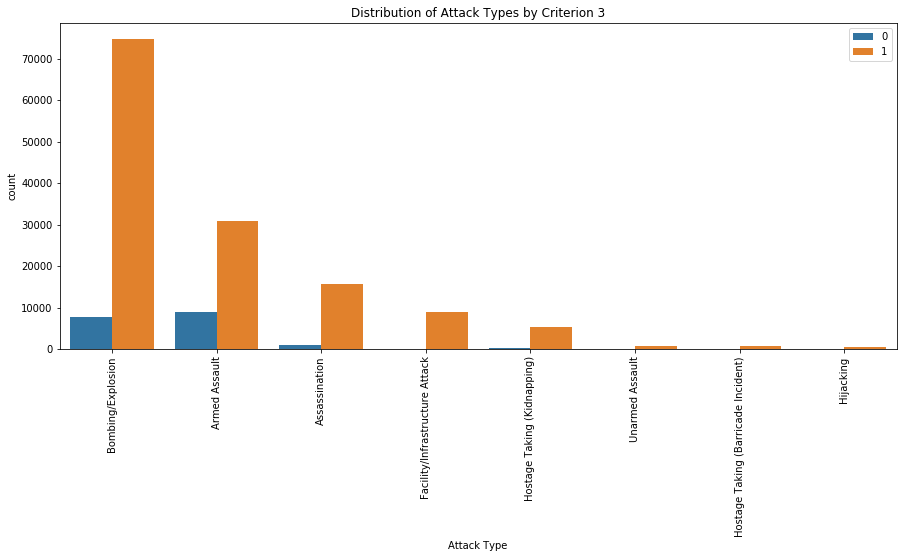

In [40]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.attacktype1_txt,\
              hue = data2.crit3,\
             order = data2.attacktype1_txt.value_counts().index)
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
plt.title("Distribution of Attack Types by Criterion 3")
plt.xlabel("Attack Type")
plt.show()

In [41]:
chisq_of_df_cols(data2, "attacktype1_txt", "crit3")

Chi Square Statistic:6672.202400423383 
 p Value:0.0


From the plot, most attack types are outside the context of legitimate warfare activities. Most attacks that are not outside the context of legitimate warfare activities are armed assault, followed by bombing/ explosion and assassination

From the Chisquare test of independence, the p-value is very small, thus we reject the null hypothesis and we conclude that the variables attack type and crit3 are dependent

#### Examining Attack Types by Group Name

In [42]:
chisq_of_df_cols(data2, "attacktype1_txt", "gname")

Chi Square Statistic:126070.36336552627 
 p Value:0.0


From the Chisquare test of independence, the p-value is very small, thus we reject the null hypothesis and conclude that the variables attack type and group name are dependent

#### Examining Attack Types by Whether the Attack is Suicide Attack

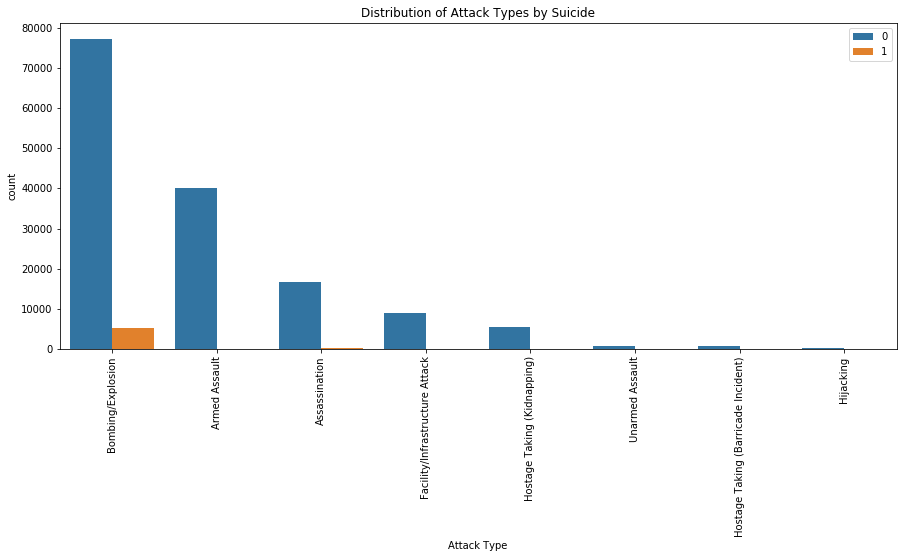

In [43]:
plt.subplots(figsize=(15,6))
sns.countplot(data2.attacktype1_txt,\
              hue = data2.suicide,\
             order = data2.attacktype1_txt.value_counts().index)
plt.xticks(rotation = 90)
plt.legend(loc = "upper right")
plt.title("Distribution of Attack Types by Suicide")
plt.xlabel("Attack Type")
plt.show()

In [44]:
chisq_of_df_cols(data2, "attacktype1_txt", "suicide")

Chi Square Statistic:4165.521935196019 
 p Value:0.0


From the plot, most attack types are not suicide attacks but if they are, they are most likely done in bombing/ explosion

From the Chisquare test of independence, the p-value is very small, thus we reject the null hypothesis and conclude that the variables attack type and suicide are dependent

### Data Modeling

#### Creating X and y Variables

X Variable: Selected based on results from exploratory analysis. Also if the variable has many missing values, it will not be included

In [45]:
X_temp = data2.loc[:,["imonth", "crit1", "crit3", "multiple", \
          "country_txt", "region_txt", "weaptype1_txt", \
          "suicide", "targtype1_txt", "target1", \
          "gname", "attacktype1_txt"]]
X_temp2 = X_temp.dropna()
X = X_temp2.loc[:,["imonth", "crit1", "crit3", "multiple", \
          "country_txt", "region_txt", "weaptype1_txt", \
          "suicide", "targtype1_txt", "target1", \
          "gname"]]

In [46]:
X["target1"] = X["target1"].astype(str)
X["gname"] = X["gname"].astype(str)

In [47]:
y = X_temp2.loc[:,"attacktype1_txt"]

#### Splitting the X and y Variables into Training and Testing Sets

60% of the data will be assigned to training set and 40% will be assigned to testing set

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

In [49]:
print(y_train.shape)
print(X_train.shape)

(93544,)
(93544, 11)


#### Use Label Encoder to Transform Non-numerical Predictors to Numerical 

Reason: The algorithms we used require the predictors to be numerical

In [50]:
le=LabelEncoder()

# Iterating over all the common columns in train and test
for col in X_test.columns.values:
    # Encoding only categorical variables
    if X_test[col].dtypes=='object':
    # Using whole data to form an exhaustive list of levels
        data3 = X_train[col].append(X_test[col])
        le.fit(data3.values)
        X_train[col] = le.transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

/Users/BrianNg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/BrianNg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


#### Scale Predictors

Scaling the predictors would allow our algorithms to learn more quickly and give better solutions

In [51]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

#### Multi-Class Logistic Regression Using One vs Rest Method

We tuned the parameter of the logistic model using 5-fold cross validation

In [52]:
logreg = LogisticRegression(multi_class='ovr')

In [53]:
c_space = np.logspace(-5, 8, 15)
param_grid = {"C": c_space, "penalty": ['l1', 'l2']}

In [54]:
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

In [55]:
logreg_cv.fit(X_train2, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.4393970560760795, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.7770140254853332


#### Predicting the Test Set Results

In [57]:
y_pred = logreg_cv.predict(X_test2)

#### Confusion Matrix

In [58]:
print(confusion_matrix(y_test, y_pred))

[[14989   174   700   171     0     0     0     0]
 [ 5432    92  1178    55     0     0     0     0]
 [  397     7 32416    36     0     0     0     0]
 [ 2666     9    17   887     0     0     0     0]
 [  107     6    31    12     0     0     0     0]
 [  275     5    46     3     0     0     0     0]
 [ 2155    34    80    36     0     0     0     0]
 [  211     0    85    51     0     0     0     0]]


#### Accuracy

In [59]:
accuracy_score(y_test,logreg_cv.predict(X_test2))

0.7758446514760354

### Random Forest 

In [60]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train2, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Predicting the Test Set Results

In [61]:
y_pred2 = classifier.predict(X_test2)

#### Confusion Matrix

In [62]:
print(confusion_matrix(y_test, y_pred2))

[[13176  1354   594   386    13    35   445    31]
 [ 2137  3347   990    59     3     7   179    35]
 [  473   433 31826    79     1    10    26     8]
 [  449    67    15  2997     3     4    31    13]
 [   83     9    22    11    24     0     6     1]
 [  132    37    44    21     2    83     9     1]
 [ 1307   298    64    52     3    10   559    12]
 [   75    37    11    19     0     0    26   179]]


#### Accuracy

In [63]:
accuracy_score(y_test,classifier.predict(X_test2))

0.836890463896862

#### Variable Importance

In [64]:
print(sorted(list(zip(X.columns, classifier.feature_importances_)), reverse = True))

[('weaptype1_txt', 0.4952054476601271), ('targtype1_txt', 0.07567198911206133), ('target1', 0.1635172488370289), ('suicide', 0.006034917958610361), ('region_txt', 0.04477077688077203), ('multiple', 0.009416754926645973), ('imonth', 0.07225861354638294), ('gname', 0.05783572702502986), ('crit3', 0.00879841927872903), ('crit1', 0.002552021243761473), ('country_txt', 0.06393808353085109)]


### Findings and Conclusions

We obtained an accuracy of around 77.6% for multi-class logistic model and an accuracy of around 83.7% for random forest classifier. Since the random forest classifier has a higher accuracy, it will be used as the model to predict attack types of future terrorist attacks based on past data. Also, 83.7% accuracy is reasonable for classification problem, thus we can conclude that 

Also, from our random forest classifier, we obtained the ranking of predictors based on variable importance, and the top 6 variables to predict attack types are as follows:

1. Weapon Type (weaptype1_txt): 49.5%
2. Specific Target/Victim (target1): 16.4%
3. Target/Victim Type (targtype1_txt): 7.57%
4. Month (imonth): 7.23%
5. Country (country_txt): 6.39%
6. Group Name (gname): 5.78%